In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


import keras
import keras.backend as K
from keras.models import Sequential
from keras.optimizers import Adagrad
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.layers import BatchNormalization
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from keras import regularizers
from keras import initializers
from keras.optimizers import SGD

In [55]:
# load dataset
dataset = pd.read_csv(r"C:\Users\HP\Desktop\Final\Train-72P.csv")
dataset = dataset.drop('Unnamed: 0', axis = 1)

In [56]:
# load dataset
valdata = pd.read_csv(r"C:\Users\HP\Desktop\Final\Validation-8P.csv")
valdata = valdata.drop('Unnamed: 0', axis = 1)

In [57]:
X = dataset.drop(['DepressionDi'],axis=1).values #features = X arrays 
y_train = dataset['DepressionDi'].values #labels = y arrays

In [58]:
X_val = valdata.drop(['DepressionDi'],axis=1).values #features = X arrays 
y_val = valdata['DepressionDi'].values #labels = y arrays

In [59]:
columns_to_encode = [
'background',
'Household_decision'
 ]
columns_to_scale  = [
 'Stat1',
 'Stat2',
 'Stat3',
 'Stat4',
 'Stat5',
 'Stat6',
 'Stat7',
 'Stat8',
 'Stat9',
 'Stat10',
 'Stat11',
 'Stat12',
 'Stat13',
 'Stat14',
 'Stat15',
 'Stat16',
 'Stat17',
 'Stat18',
 'Stat19',
 'Stat20',
 'Stat21',
 'Stat22',
 'Stat23',
 'Stat24'
]


# Instantiate encoder/scaler
scaler = StandardScaler()
ohe    = OneHotEncoder(sparse=False)



# Scale and Encode Separate Columns
scaled_columns  = scaler.fit_transform(dataset[columns_to_scale]) 
encoded_columns =    ohe.fit_transform(dataset[columns_to_encode])
#encoded_columns = encoder.fit_transform(dataset[columns_to_encode])

# Concatenate (Column-Bind) Processed Columns Back Together
X_train = np.concatenate([scaled_columns, encoded_columns], axis=1)

In [60]:
columns_to_encode = [
'background',
'Household_decision'
 ]
columns_to_scale  = [
 'Stat1',
 'Stat2',
 'Stat3',
 'Stat4',
 'Stat5',
 'Stat6',
 'Stat7',
 'Stat8',
 'Stat9',
 'Stat10',
 'Stat11',
 'Stat12',
 'Stat13',
 'Stat14',
 'Stat15',
 'Stat16',
 'Stat17',
 'Stat18',
 'Stat19',
 'Stat20',
 'Stat21',
 'Stat22',
 'Stat23',
 'Stat24'
]


# Scale and Encode Separate Columns
scaled_columns  = scaler.transform(valdata[columns_to_scale]) 
encoded_columns =    ohe.transform(valdata[columns_to_encode])

# Concatenate (Column-Bind) Processed Columns Back Together
X_val = np.concatenate([scaled_columns, encoded_columns], axis=1)

In [61]:
model = Sequential()
model.add(Dense(11,input_shape=(31,),activation='relu',kernel_regularizer=regularizers.l2(0.01),kernel_initializer = initializers.glorot_uniform(seed=None)))
model.add(Dense(7,activation='relu',kernel_regularizer=regularizers.l2(0.01),kernel_initializer = initializers.glorot_uniform(seed=None)))
model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.01), kernel_initializer = initializers.glorot_uniform(seed=None)))


model.compile(loss='binary_crossentropy',optimizer=Adam(lr = 0.001),metrics = ['accuracy'])

In [62]:
history = model.fit(X_train, y_train, epochs = 90, batch_size = 32, verbose = 1, validation_data = [X_val, y_val])
history_dict=history.history

Train on 360 samples, validate on 40 samples
Epoch 1/90
360/360 [==============================] - 0s 1ms/step - loss: 1.0242 - acc: 0.5167 - val_loss: 0.9478 - val_acc: 0.5750
Epoch 2/90
360/360 [==============================] - 0s 67us/step - loss: 0.9744 - acc: 0.5389 - val_loss: 0.9094 - val_acc: 0.7000
Epoch 3/90
360/360 [==============================] - 0s 47us/step - loss: 0.9374 - acc: 0.5472 - val_loss: 0.8833 - val_acc: 0.6750
Epoch 4/90
360/360 [==============================] - 0s 47us/step - loss: 0.9116 - acc: 0.5778 - val_loss: 0.8633 - val_acc: 0.6500
Epoch 5/90
360/360 [==============================] - 0s 47us/step - loss: 0.8900 - acc: 0.6139 - val_loss: 0.8463 - val_acc: 0.7000
Epoch 6/90
360/360 [==============================] - 0s 47us/step - loss: 0.8702 - acc: 0.6361 - val_loss: 0.8314 - val_acc: 0.7750
Epoch 7/90
360/360 [==============================] - 0s 46us/step - loss: 0.8524 - acc: 0.6583 - val_loss: 0.8199 - val_acc: 0.7750
Epoch 8/90
360/360 [=====

Epoch 62/90
360/360 [==============================] - 0s 50us/step - loss: 0.4992 - acc: 0.8250 - val_loss: 0.5600 - val_acc: 0.8000
Epoch 63/90
360/360 [==============================] - 0s 44us/step - loss: 0.4979 - acc: 0.8222 - val_loss: 0.5597 - val_acc: 0.8250
Epoch 64/90
360/360 [==============================] - 0s 39us/step - loss: 0.4959 - acc: 0.8250 - val_loss: 0.5590 - val_acc: 0.8250
Epoch 65/90
360/360 [==============================] - 0s 42us/step - loss: 0.4944 - acc: 0.8278 - val_loss: 0.5581 - val_acc: 0.8000
Epoch 66/90
360/360 [==============================] - 0s 39us/step - loss: 0.4926 - acc: 0.8222 - val_loss: 0.5579 - val_acc: 0.8000
Epoch 67/90
360/360 [==============================] - 0s 42us/step - loss: 0.4913 - acc: 0.8278 - val_loss: 0.5582 - val_acc: 0.8250
Epoch 68/90
360/360 [==============================] - 0s 39us/step - loss: 0.4898 - acc: 0.8306 - val_loss: 0.5581 - val_acc: 0.8000
Epoch 69/90
360/360 [==============================] - 0s 39us

Text(0.5,0,'Epochs')

<Figure size 432x288 with 0 Axes>

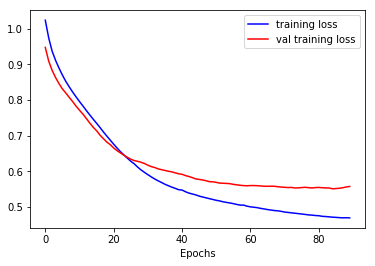

In [63]:
# Plot training loss and validation split loss over the epochs

loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure()
plt.figure()
plt.plot(loss_values,'b',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')
plt.legend()
plt.xlabel("Epochs")

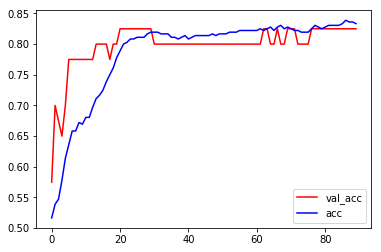

In [64]:
# Plot accuracy over the epochs
accuracy_values = history_dict['acc']
val_accuracy_values=history_dict['val_acc']
plt.plot(val_accuracy_values,'-r',label='val_acc')
plt.plot(accuracy_values,'-b',label='acc')
plt.legend()

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 11)                352       
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 84        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 8         
Total params: 444
Trainable params: 444
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.save_weights('model_weights1.h5')

In [67]:
y_val_pred = model.predict(X_val) 
rounded = [round(x[0]) for x in y_val_pred]
ypred1 = np.array(rounded,dtype='int64')
confusion_matrix(y_val,ypred1)

array([[18,  2],
       [ 5, 15]], dtype=int64)

In [68]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, ypred1)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("Validation auc: ", roc_auc)

Validation auc:  0.825


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_val, ypred1))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84        20
           1       0.88      0.75      0.81        20

    accuracy                           0.82        40
   macro avg       0.83      0.82      0.82        40
weighted avg       0.83      0.82      0.82        40



In [70]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, ypred1)

0.825

In [71]:
from sklearn.metrics import f1_score
f1_score(y_val, ypred1, average='weighted')

0.824010056568196